In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from tqdm import tqdm
from statistics import mean
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from data_readers import (
    japanese_vowels,
    water_quality,
    ionosphere,
    heart_attack,
    banana_quality,
    climate,
    diabetes,
    biodegradable,
    plates
)

from classes import (
    ADAMLogisticRegression,
    IWLSLogisticRegression,
    SGDLogisticRegression,
)

In [2]:
models = {
    "ADAM Logistic Regression": ADAMLogisticRegression(
        learning_rate=0.001,
        iterations=500,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        include_interactions=False,
    ),
    "SGD Logistic Regression": SGDLogisticRegression(
        learning_rate=0.01, iterations=500, include_interactions=False
    ),
    "IWLS Logistic Regression": IWLSLogisticRegression(
        iterations=500, include_interactions=False
    ),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

datasets = {
    "Water Quality": water_quality(),
    "Ionosphere": ionosphere(),
    "Heart Attack": heart_attack(),
    "Japanese Vowels": japanese_vowels(),
    "Banana quality": banana_quality(),
    "Climate": climate(),
    "Diabetes": diabetes(),
    "Biodegradable": biodegradable(),
    "Plates": plates()
}

In [3]:
n_runs = 5  # at least 5

scaler = StandardScaler()
dataset_performances = dict()
all_performances = []


for dataset_name, data in datasets.items():
    print(f'***{dataset_name}***\n')
    X, y = data
    models_performances = dict()
    for name, model in models.items():
        print(f'\t{name}')
        models_performances[name] = []
        for _ in tqdm(range(n_runs)):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2
             )
            
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)

            accuracy = balanced_accuracy_score(y_test, predictions)
            models_performances[name].append(accuracy)
        
        
        print(f'Balanced accuracy: {round(mean(models_performances[name])*100, 2)}%\n\n')
    dataset_performances[dataset_name] = models_performances
    print(dataset_performances)

***Water Quality***

	ADAM Logistic Regression


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.26it/s]


Balanced accuracy: 51.89%


	SGD Logistic Regression


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Optimization converged after 4 iterations.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00, 10.31it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:00<00:00, 10.65it/s]

Optimization converged after 4 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.47it/s]


Optimization converged after 4 iterations.
Balanced accuracy: 50.66%


	IWLS Logistic Regression


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

Optimization converged after 4 iterations.


 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  9.95it/s]

Optimization converged after 4 iterations.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00, 11.27it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 11.16it/s]


Balanced accuracy: 50.46%


	LDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 225.60it/s]


Balanced accuracy: 50.98%


	QDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 319.72it/s]


Balanced accuracy: 59.86%


	Decision Tree


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 43.12it/s]


Balanced accuracy: 99.51%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.57it/s]


Balanced accuracy: 84.74%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}}
***Ionosphere***

	ADAM Logistic Regression


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 36.76it/s]


Balanced accuracy: 78.76%


	SGD Logistic Regression


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:06<00:00,  1.23s/it]


Balanced accuracy: 68.15%


	IWLS Logistic Regression


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 62.50it/s]


Optimization converged after 10 iterations.
Optimization converged after 23 iterations.
Optimization converged after 24 iterations.
Optimization converged after 9 iterations.
Optimization converged after 22 iterations.
Balanced accuracy: 72.21%


	LDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 294.04it/s]


Balanced accuracy: 69.28%


	QDA


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 333.32it

Balanced accuracy: 51.9%


	Decision Tree


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 333.68it/s]


Balanced accuracy: 62.52%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.88it/s]


Balanced accuracy: 77.58%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.77

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 34.48it/s]


Balanced accuracy: 84.16%


	SGD Logistic Regression


 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00, 12.58it/s]

Optimization converged after 37 iterations.
Optimization converged after 35 iterations.
Optimization converged after 48 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.94it/s]

Optimization converged after 45 iterations.
Optimization converged after 41 iterations.


Balanced accuracy: 80.77%


	IWLS Logistic Regression


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 207.74it/s]


Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Balanced accuracy: 80.69%


	LDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 499.96it/s]


Balanced accuracy: 82.35%


	QDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 712.59it/s]


Balanced accuracy: 79.1%


	Decision Tree


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 623.37it/s]


Balanced accuracy: 71.64%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.42it/s]


Balanced accuracy: 79.5%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.772

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.47it/s]


Balanced accuracy: 91.85%


	SGD Logistic Regression


 20%|████████████████▊                                                                   | 1/5 [00:06<00:25,  6.30s/it]

Optimization converged after 97 iterations.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:15<00:24,  8.15s/it]

Optimization converged after 145 iterations.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:21<00:13,  6.94s/it]

Optimization converged after 84 iterations.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:30<00:08,  8.05s/it]

Optimization converged after 149 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:39<00:00,  7.92s/it]


Optimization converged after 132 iterations.
Balanced accuracy: 93.34%


	IWLS Logistic Regression


 20%|████████████████▊                                                                   | 1/5 [00:01<00:06,  1.68s/it]

Optimization converged after 10 iterations.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:03<00:05,  1.70s/it]

Optimization converged after 10 iterations.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:05<00:03,  1.72s/it]

Optimization converged after 10 iterations.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:06<00:01,  1.72s/it]

Optimization converged after 10 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:08<00:00,  1.73s/it]


Optimization converged after 10 iterations.
Balanced accuracy: 92.39%


	LDA


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 59.02it/s]


Balanced accuracy: 88.6%


	QDA


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 80.00it/s]


Balanced accuracy: 96.51%


	Decision Tree


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 13.06it/s]


Balanced accuracy: 94.91%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.04s/it]


Balanced accuracy: 97.01%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.77

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.20it/s]


Balanced accuracy: 87.13%


	SGD Logistic Regression


 20%|████████████████▊                                                                   | 1/5 [00:00<00:02,  1.75it/s]

Optimization converged after 11 iterations.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:01<00:01,  1.65it/s]

Optimization converged after 12 iterations.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:01,  1.67it/s]

Optimization converged after 11 iterations.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:02<00:00,  1.69it/s]

Optimization converged after 11 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.69it/s]


Optimization converged after 11 iterations.
Balanced accuracy: 87.55%


	IWLS Logistic Regression


 20%|████████████████▊                                                                   | 1/5 [00:00<00:03,  1.16it/s]

Optimization converged after 8 iterations.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:01<00:02,  1.15it/s]

Optimization converged after 8 iterations.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:02<00:01,  1.15it/s]

Optimization converged after 8 iterations.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:03<00:00,  1.14it/s]

Optimization converged after 8 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.14it/s]


Optimization converged after 8 iterations.
Balanced accuracy: 87.82%


	LDA


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 89.29it/s]


Balanced accuracy: 87.69%


	QDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 172.43it/s]


Balanced accuracy: 92.24%


	Decision Tree


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 22.53it/s]


Balanced accuracy: 93.88%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.20it/s]


Balanced accuracy: 97.05%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.77

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 33.43it/s]


Balanced accuracy: 75.83%


	SGD Logistic Regression


 20%|████████████████▊                                                                   | 1/5 [00:00<00:02,  1.77it/s]

Optimization converged after 159 iterations.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:01<00:01,  1.70it/s]

Optimization converged after 169 iterations.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:01,  1.80it/s]

Optimization converged after 143 iterations.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:02<00:00,  1.96it/s]

Optimization converged after 122 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  1.94it/s]


Optimization converged after 124 iterations.
Balanced accuracy: 60.27%


	IWLS Logistic Regression


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 119.08it/s]


Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Optimization converged after 8 iterations.
Balanced accuracy: 61.95%


	LDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 384.19it/s]


Balanced accuracy: 58.24%


	QDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 500.20it/s]


Balanced accuracy: 58.68%


	Decision Tree


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 263.10it/s]


Balanced accuracy: 55.55%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.21it/s]


Balanced accuracy: 49.9%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.772

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 30.30it/s]


Balanced accuracy: 68.91%


	SGD Logistic Regression


 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  8.00it/s]

Optimization converged after 27 iterations.


 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  7.50it/s]

Optimization converged after 26 iterations.


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00,  7.55it/s]

Optimization converged after 26 iterations.


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:00<00:00,  7.10it/s]

Optimization converged after 30 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.34it/s]


Optimization converged after 24 iterations.
Balanced accuracy: 69.01%


	IWLS Logistic Regression


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 106.69it/s]

Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.


Balanced accuracy: 73.6%


	LDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 766.92it/s]


Balanced accuracy: 70.49%


	QDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 319.31it/s]


Balanced accuracy: 71.14%


	Decision Tree


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 320.00it/s]


Balanced accuracy: 65.49%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.90it/s]


Balanced accuracy: 74.13%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.77

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.27it/s]


Balanced accuracy: 84.39%


	SGD Logistic Regression


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:18<00:00,  3.64s/it]


Balanced accuracy: 85.43%


	IWLS Logistic Regression


 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00, 14.82it/s]

Optimization converged after 17 iterations.
Optimization converged after 17 iterations.
Optimization converged after 17 iterations.
Optimization converged after 17 iterations.


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.15it/s]


Optimization converged after 17 iterations.
Balanced accuracy: 84.41%


	LDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 108.70it/s]


Balanced accuracy: 82.84%


	QDA


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Py

Balanced accuracy: 67.44%


	Decision Tree


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 118.99it/s]


Balanced accuracy: 80.58%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.08it/s]


Balanced accuracy: 84.0%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.772

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 20%|████████████████▊                                                                   | 1/5 [00:00<00:00,  7.58it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  7.86it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3

Balanced accuracy: 17.3%


	SGD Logistic Regression


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 20%|████████████████▊                                                                   | 1/5 [00:06<00:25,  6.46s/it]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 40%|█████████████████████████████████▌                                                  | 2/5 [00:12<00:19,  6.48s/it]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3

Balanced accuracy: 46.91%


	IWLS Logistic Regression


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:00,  5.28it/s]

Optimization converged after 37 iterations.


C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:00,  2.39it/s]

Optimization converged after 75 iterations.


C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  2.95it/s]


Optimization converged after 50 iterations.
Optimization converged after 8 iterations.
Balanced accuracy: 48.27%


	LDA


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 104.16it/s]


Balanced accuracy: 67.71%


	QDA


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\szymc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Py

Balanced accuracy: 90.0%


	Decision Tree


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 128.21it/s]


Balanced accuracy: 100.0%


	Random Forest


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.41it/s]

Balanced accuracy: 99.69%


{'Water Quality': {'ADAM Logistic Regression': [0.5226540504455345, 0.5163507773875521, 0.5188948498906423, 0.5269217711819196, 0.5099218750000001], 'SGD Logistic Regression': [0.5021093750000001, 0.5102440553139813, 0.5150166852057843, 0.5057065741276268, 0.4997294372294372], 'IWLS Logistic Regression': [0.502472231453229, 0.5108239924702661, 0.5136001769128704, 0.5029968268891761, 0.49307358468632545], 'LDA': [0.5134528929327209, 0.5156093481030508, 0.5081300813008129, 0.5097375507262867, 0.5020131682600196], 'QDA': [0.602542662950467, 0.5902831204800739, 0.5702660098522168, 0.6191623867864077, 0.6108239586500456], 'Decision Tree': [0.9911123963755543, 0.9967583807716636, 0.9948912198912199, 0.9937260302795551, 0.9987654320987654], 'Random Forest': [0.8612389023405973, 0.8170480549199084, 0.8403824543728446, 0.8594126189475293, 0.8588485060963733]}, 'Ionosphere': {'ADAM Logistic Regression': [0.9621212121212122, 0.7344262295081967, 0.7038461538461538, 0.77

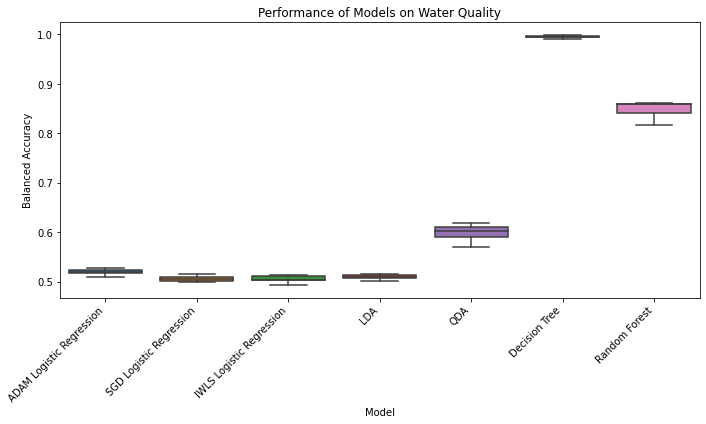

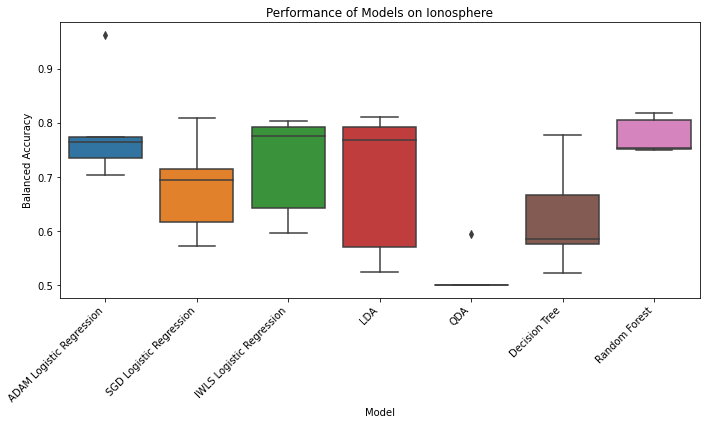

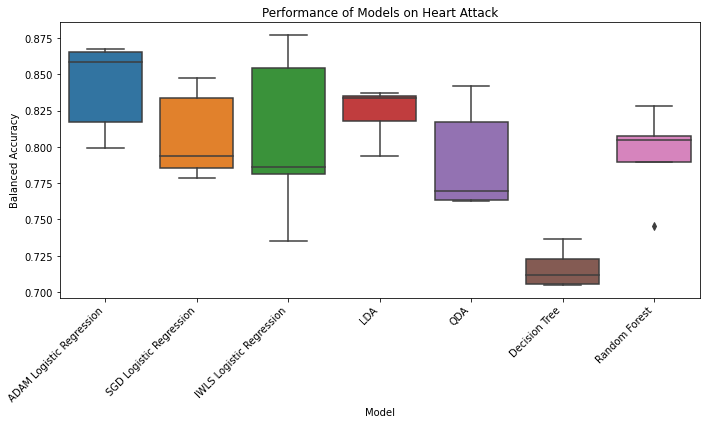

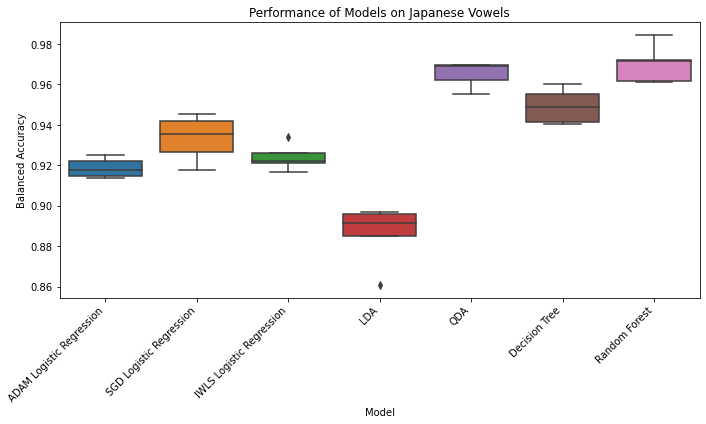

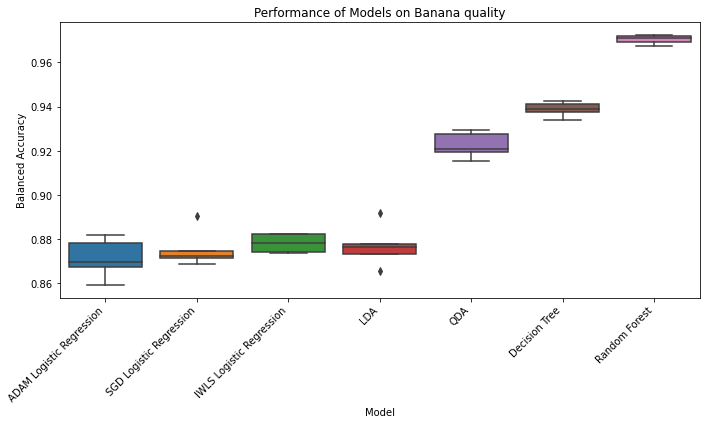

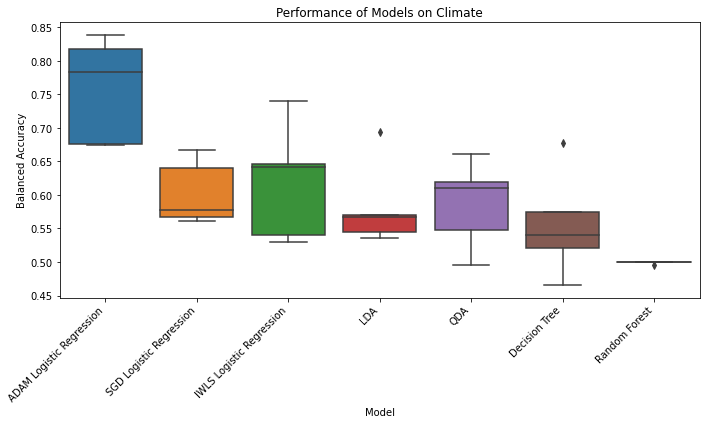

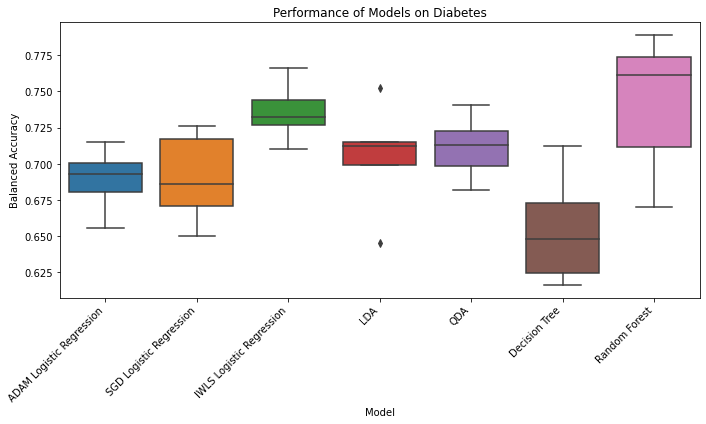

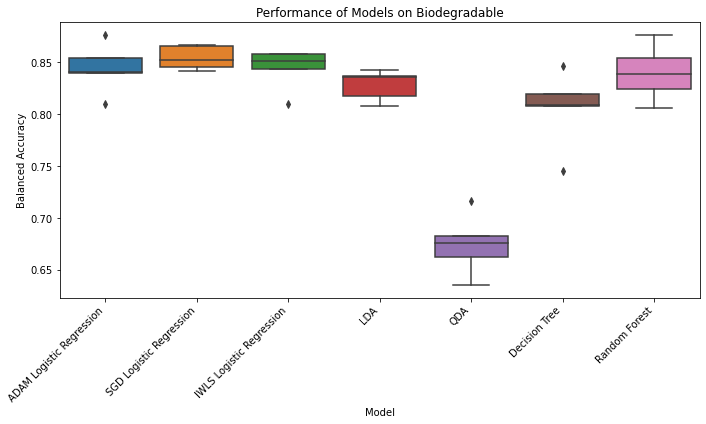

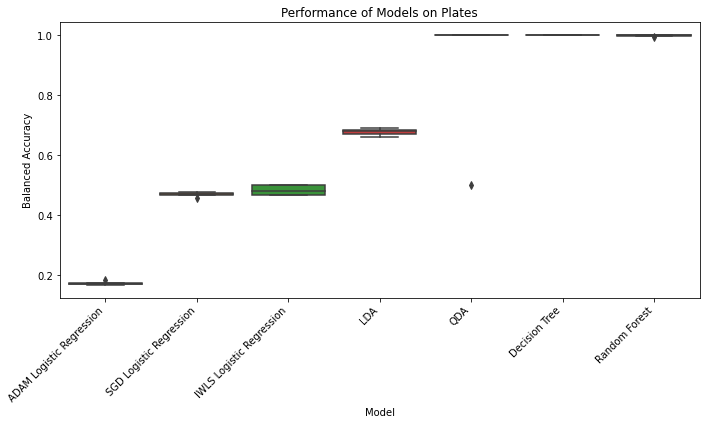

In [4]:
for dataset_name, performances in dataset_performances.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'Performance of Models on {dataset_name}')
    
    # Convert performances dictionary to a DataFrame for easier plotting
    df = pd.DataFrame(performances)
    
    # Plotting boxplot
    sns.boxplot(data=df)
    
    plt.xlabel('Model')
    plt.ylabel('Balanced Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [5]:
models_interactions = {
    "ADAM Logistic Regression": ADAMLogisticRegression(
        learning_rate=0.001,
        iterations=500,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        include_interactions=False,
    ),
    "ADAM Logistic Regression with interactions": ADAMLogisticRegression(
        learning_rate=0.001,
        iterations=500,
        beta1=0.9,
        beta2=0.999,
        epsilon=1e-8,
        include_interactions=True,
    ),
    "SGD Logistic Regression": SGDLogisticRegression(
        learning_rate=0.01, iterations=500, include_interactions=False
    ),
    "SGD Logistic Regression with interactions": SGDLogisticRegression(
        learning_rate=0.01, iterations=500, include_interactions=True
    ),
    "IWLS Logistic Regression": IWLSLogisticRegression(
        iterations=500, include_interactions=False
    ),
    "IWLS Logistic Regression with interactions": IWLSLogisticRegression(
        iterations=500, include_interactions=True
    )
}

datasets_small = {
    "Water Quality": water_quality(),
    "Banana quality": banana_quality(),
    "Diabetes": diabetes()
}

In [6]:
n_runs = 10  # at least 5

scaler = StandardScaler()
dataset_performances2 = dict()
all_performances = []

for dataset_name, data in datasets_small.items():
    print(f'***{dataset_name}***\n')
    X, y = data
    models_performances = dict()
    for name, model in models_interactions.items():
        print(f'\t{name}')
        models_performances[name] = []
        for _ in tqdm(range(n_runs)):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.2
             )
            
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            model.fit(X_train_scaled, y_train)
            predictions = model.predict(X_test_scaled)

            accuracy = balanced_accuracy_score(y_test, predictions)
            models_performances[name].append(accuracy)
        
        
        print(f'Balanced accuracy: {round(mean(models_performances[name])*100, 2)}%\n\n')
    dataset_performances2[dataset_name] = models_performances
    print(dataset_performances2)

***Water Quality***

	ADAM Logistic Regression


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.07it/s]


Balanced accuracy: 51.93%


	ADAM Logistic Regression with interactions


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  6.51it/s]


Balanced accuracy: 61.32%


	SGD Logistic Regression


 20%|████████████████▌                                                                  | 2/10 [00:00<00:00, 11.22it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:00, 10.45it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:00<00:00, 10.22it/s]

Optimization converged after 4 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:00<00:00, 10.12it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.26it/s]


Optimization converged after 4 iterations.
Optimization converged after 4 iterations.
Balanced accuracy: 51.8%


	SGD Logistic Regression with interactions


 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  5.90it/s]

Optimization converged after 7 iterations.
Optimization converged after 7 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  6.28it/s]

Optimization converged after 6 iterations.
Optimization converged after 7 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:00<00:00,  6.19it/s]

Optimization converged after 6 iterations.
Optimization converged after 7 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  5.86it/s]

Optimization converged after 8 iterations.
Optimization converged after 7 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.97it/s]


Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Balanced accuracy: 59.84%


	IWLS Logistic Regression


 20%|████████████████▌                                                                  | 2/10 [00:00<00:00, 12.99it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:00, 11.77it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:00<00:00, 11.13it/s]

Optimization converged after 4 iterations.
Optimization converged after 4 iterations.
Optimization converged after 4 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.33it/s]


Optimization converged after 4 iterations.
Balanced accuracy: 51.26%


	IWLS Logistic Regression with interactions


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  5.85it/s]

Optimization converged after 6 iterations.


 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  5.99it/s]

Optimization converged after 6 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  6.00it/s]

Optimization converged after 6 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:00,  6.22it/s]

Optimization converged after 6 iterations.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:00<00:00,  6.13it/s]

Optimization converged after 6 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:00<00:00,  6.06it/s]

Optimization converged after 6 iterations.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  6.00it/s]

Optimization converged after 6 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  5.98it/s]

Optimization converged after 6 iterations.


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:01<00:00,  5.91it/s]

Optimization converged after 6 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.86it/s]

Optimization converged after 6 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.96it/s]


Balanced accuracy: 61.17%


{'Water Quality': {'ADAM Logistic Regression': [0.5208863328152995, 0.5148640101201771, 0.5302474524073402, 0.5128045130328027, 0.5257437070938215, 0.5215326976155601, 0.5107054054315541, 0.518035848010659, 0.5107146592129908, 0.5276422764227643], 'ADAM Logistic Regression with interactions': [0.6245958474543258, 0.6095988042326995, 0.5945018187492076, 0.6206733901948007, 0.6041068450707006, 0.6505867897328728, 0.5935239730420453, 0.592447026657553, 0.6164817210157261, 0.625006206862307], 'SGD Logistic Regression': [0.5235156249999999, 0.5336748768472906, 0.5181364107831586, 0.4972623867360709, 0.5231464846089352, 0.5113044892648015, 0.5241281733683776, 0.5023829467664135, 0.511243993171704, 0.5347389162561577], 'SGD Logistic Regression with interactions': [0.6017714954672548, 0.6220696794667131, 0.597356939737447, 0.5844659137028201, 0.5960425045930781, 0.6156793312628799, 0.569453125, 0.580215515983778, 0.6013299193640845, 0.616015034680513], 'IWLS Logisti

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.12it/s]


Balanced accuracy: 87.07%


	ADAM Logistic Regression with interactions


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.32it/s]


Balanced accuracy: 93.36%


	SGD Logistic Regression


 10%|████████▎                                                                          | 1/10 [00:00<00:05,  1.73it/s]

Optimization converged after 11 iterations.


 20%|████████████████▌                                                                  | 2/10 [00:01<00:04,  1.72it/s]

Optimization converged after 11 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:01<00:04,  1.66it/s]

Optimization converged after 12 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:02<00:03,  1.68it/s]

Optimization converged after 11 iterations.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  1.75it/s]

Optimization converged after 10 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:03<00:02,  1.81it/s]

Optimization converged after 10 iterations.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:03<00:01,  1.83it/s]

Optimization converged after 10 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:04<00:01,  1.73it/s]

Optimization converged after 12 iterations.


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:05<00:00,  1.68it/s]

Optimization converged after 12 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.72it/s]


Optimization converged after 11 iterations.
Balanced accuracy: 87.83%


	SGD Logistic Regression with interactions


 10%|████████▎                                                                          | 1/10 [00:02<00:23,  2.62s/it]

Optimization converged after 50 iterations.


 20%|████████████████▌                                                                  | 2/10 [00:05<00:24,  3.07s/it]

Optimization converged after 64 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:09<00:21,  3.04s/it]

Optimization converged after 57 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:11<00:17,  2.99s/it]

Optimization converged after 55 iterations.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:14<00:14,  2.99s/it]

Optimization converged after 57 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:17<00:11,  2.97s/it]

Optimization converged after 56 iterations.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:21<00:09,  3.05s/it]

Optimization converged after 61 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:23<00:05,  2.95s/it]

Optimization converged after 52 iterations.


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:26<00:02,  2.93s/it]

Optimization converged after 55 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:29<00:00,  3.00s/it]


Optimization converged after 62 iterations.
Balanced accuracy: 95.32%


	IWLS Logistic Regression


 10%|████████▎                                                                          | 1/10 [00:00<00:07,  1.17it/s]

Optimization converged after 8 iterations.


 20%|████████████████▌                                                                  | 2/10 [00:01<00:06,  1.16it/s]

Optimization converged after 8 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:02<00:06,  1.16it/s]

Optimization converged after 8 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:03<00:05,  1.15it/s]

Optimization converged after 8 iterations.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:04<00:04,  1.15it/s]

Optimization converged after 8 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:05<00:03,  1.15it/s]

Optimization converged after 8 iterations.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:06<00:02,  1.15it/s]

Optimization converged after 8 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:06<00:01,  1.15it/s]

Optimization converged after 8 iterations.


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:07<00:00,  1.15it/s]

Optimization converged after 8 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.15it/s]


Optimization converged after 8 iterations.
Balanced accuracy: 88.15%


	IWLS Logistic Regression with interactions


 10%|████████▎                                                                          | 1/10 [00:01<00:10,  1.15s/it]

Optimization converged after 9 iterations.


 20%|████████████████▌                                                                  | 2/10 [00:02<00:09,  1.14s/it]

Optimization converged after 9 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:03<00:08,  1.16s/it]

Optimization converged after 9 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:04<00:06,  1.16s/it]

Optimization converged after 9 iterations.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:05<00:05,  1.16s/it]

Optimization converged after 9 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:06<00:04,  1.16s/it]

Optimization converged after 9 iterations.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:08<00:03,  1.16s/it]

Optimization converged after 9 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:09<00:02,  1.16s/it]

Optimization converged after 9 iterations.


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:10<00:01,  1.16s/it]

Optimization converged after 9 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.16s/it]


Optimization converged after 9 iterations.
Balanced accuracy: 95.44%


{'Water Quality': {'ADAM Logistic Regression': [0.5208863328152995, 0.5148640101201771, 0.5302474524073402, 0.5128045130328027, 0.5257437070938215, 0.5215326976155601, 0.5107054054315541, 0.518035848010659, 0.5107146592129908, 0.5276422764227643], 'ADAM Logistic Regression with interactions': [0.6245958474543258, 0.6095988042326995, 0.5945018187492076, 0.6206733901948007, 0.6041068450707006, 0.6505867897328728, 0.5935239730420453, 0.592447026657553, 0.6164817210157261, 0.625006206862307], 'SGD Logistic Regression': [0.5235156249999999, 0.5336748768472906, 0.5181364107831586, 0.4972623867360709, 0.5231464846089352, 0.5113044892648015, 0.5241281733683776, 0.5023829467664135, 0.511243993171704, 0.5347389162561577], 'SGD Logistic Regression with interactions': [0.6017714954672548, 0.6220696794667131, 0.597356939737447, 0.5844659137028201, 0.5960425045930781, 0.6156793312628799, 0.569453125, 0.580215515983778, 0.60132991

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 30.30it/s]


Balanced accuracy: 71.94%


	ADAM Logistic Regression with interactions


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.10it/s]


Balanced accuracy: 68.88%


	SGD Logistic Regression


 10%|████████▎                                                                          | 1/10 [00:00<00:01,  8.63it/s]

Optimization converged after 21 iterations.


 20%|████████████████▌                                                                  | 2/10 [00:00<00:00,  8.63it/s]

Optimization converged after 23 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:00<00:00,  8.41it/s]

Optimization converged after 23 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:00,  8.07it/s]

Optimization converged after 26 iterations.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:00<00:00,  7.56it/s]

Optimization converged after 26 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:00<00:00,  7.45it/s]

Optimization converged after 26 iterations.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:00<00:00,  7.50it/s]

Optimization converged after 25 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  7.15it/s]

Optimization converged after 30 iterations.


 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:01<00:00,  7.29it/s]

Optimization converged after 26 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  7.67it/s]


Optimization converged after 23 iterations.
Balanced accuracy: 73.76%


	SGD Logistic Regression with interactions


 10%|████████▎                                                                          | 1/10 [00:00<00:04,  2.06it/s]

Optimization converged after 91 iterations.


 20%|████████████████▌                                                                  | 2/10 [00:00<00:03,  2.20it/s]

Optimization converged after 82 iterations.


 30%|████████████████████████▉                                                          | 3/10 [00:01<00:03,  2.17it/s]

Optimization converged after 87 iterations.


 40%|█████████████████████████████████▏                                                 | 4/10 [00:01<00:02,  2.22it/s]

Optimization converged after 81 iterations.


 50%|█████████████████████████████████████████▌                                         | 5/10 [00:02<00:02,  2.19it/s]

Optimization converged after 86 iterations.


 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:02<00:01,  2.28it/s]

Optimization converged after 74 iterations.


 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:03<00:01,  2.25it/s]

Optimization converged after 85 iterations.


 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:03<00:00,  2.59it/s]

Optimization converged after 46 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.94it/s]

Optimization converged after 82 iterations.
Optimization converged after 35 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.47it/s]


Balanced accuracy: 72.89%


	IWLS Logistic Regression


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 97.09it/s]


Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Optimization converged after 6 iterations.
Balanced accuracy: 70.6%


	IWLS Logistic Regression with interactions


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 55.25it/s]

Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Optimization converged after 7 iterations.
Balanced accuracy: 73.47%


{'Water Quality': {'ADAM Logistic Regression': [0.5208863328152995, 0.5148640101201771, 0.5302474524073402, 0.5128045130328027, 0.5257437070938215, 0.5215326976155601, 0.5107054054315541, 0.518035848010659, 0.5107146592129908, 0.5276422764227643], 'ADAM Logistic Regression with interactions': [0.6245958474543258, 0.6095988042326995, 0.5945018187492076, 0.6206733901948007, 0.6041068450707006, 0.6505867897328728, 0.5935239730420453, 0.592447026657553, 0.6164817210157261, 0.625006206862307], 'SGD Logistic Regression': [0.5235156249999999, 0.5336748768472906, 0.5181364107831586, 0.4972623867360709, 0.5231464846089352, 0.5113044892648015, 0.5241281733683776, 0.5023829467664135, 0.511243993171704, 0.5347389162561577], 'SGD Logistic Regression with inter

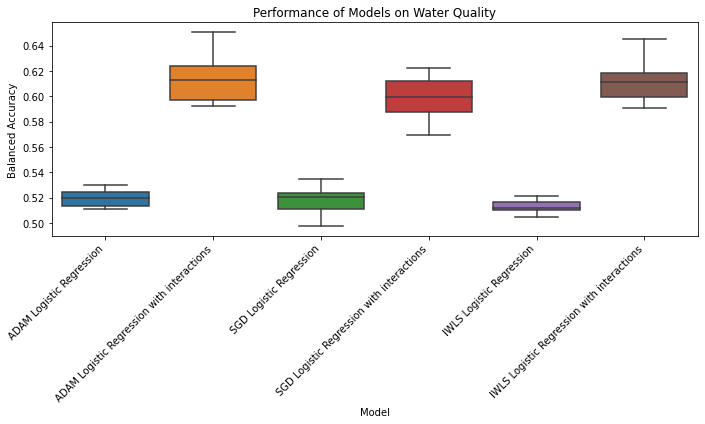

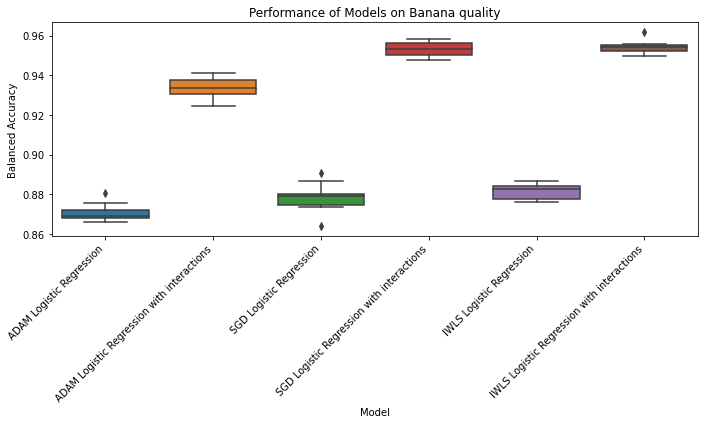

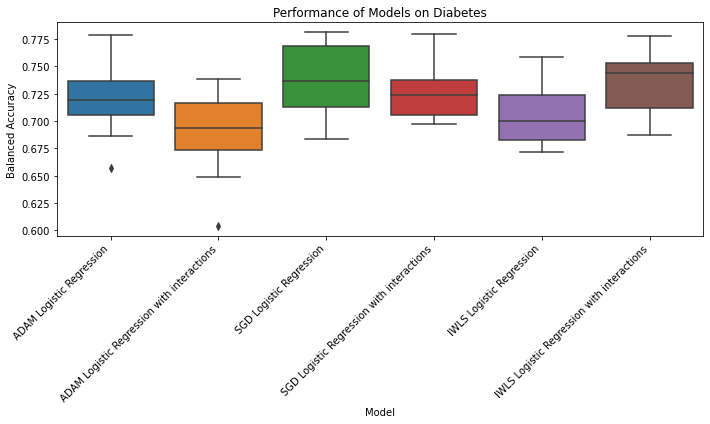

In [7]:
for dataset_name, performances in dataset_performances2.items():
    plt.figure(figsize=(10, 6))
    plt.title(f'Performance of Models on {dataset_name}')
    df = pd.DataFrame(performances)
    
    sns.boxplot(data=df)
    
    plt.xlabel('Model')
    plt.ylabel('Balanced Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()